# In this Notebook I will be trying to classify different satellite images using Convolutional Neural Networks

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pathlib 
import random

## Here I am importing the satellite images from a local folder which contains 5631 files split into 4 folders

In [2]:
path = 'F:/Machine Learning Project/archive/data/'
data_dir = pathlib.Path(path)

In [3]:
import glob
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['cloudy', 'desert', 'green_area', 'water'], dtype='<U10')

### Define paths and make plotting of random images

cloudyPath = os.path.join(data_dir,'cloudy')
desertPath = os.path.join(data_dir,'desert')
green_areaPath = os.path.join(data_dir,'green_area')
waterPath = os.path.join(data_dir,'water')

In [4]:
imageCount = len(list(data_dir.glob('*/*.jpg')))
imageCount

5631

### Plot 25 random Images of the satellites

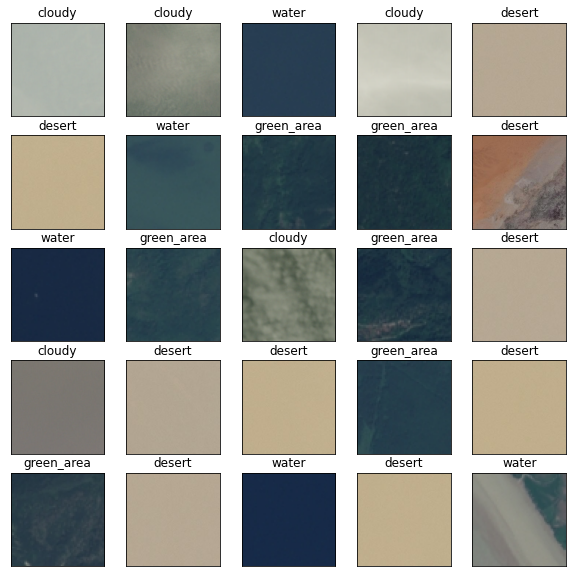

In [5]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.jpg"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

# Build The CNN

### Defining batch_size,img_height and width then use image_dataset_from_directory to split the data into training and validation set

In [6]:
batch_size = 32
img_height = 224
img_width = 224


In [7]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)
val_data = image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 5631 files belonging to 4 classes.
Using 4505 files for training.
Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


# Define the Model

### The model have 3 blocks where in each block we have one convolutional layer and a max pooling .We rescale images add a Dropout to avoid the overfitting as we have 4 class the last layer contain the number of class and we have softmax as activation,it will give us a pourcentage of each class and we'll choice the maximum pourcentage as the class

In [8]:
from tensorflow.keras import layers 
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
    
  layers.Dense(128, activation='relu'),
  layers.Dense(4,activation="softmax")  
])

# Compile the Model

In [9]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

In [11]:
epochs = 10
history = model.fit(train_data, epochs=epochs,validation_data=val_data, batch_size=batch_size)

Epoch 1/10
141/141 [==============================] - 115s 814ms/step - loss: 0.1412 - accuracy: 0.9392 - val_loss: 0.1548 - val_accuracy: 0.9325
Epoch 2/10
141/141 [==============================] - 120s 849ms/step - loss: 0.1296 - accuracy: 0.9434 - val_loss: 0.1406 - val_accuracy: 0.9476
Epoch 3/10
141/141 [==============================] - 118s 840ms/step - loss: 0.2109 - accuracy: 0.9232 - val_loss: 0.1648 - val_accuracy: 0.9334
Epoch 4/10
141/141 [==============================] - 141s 1s/step - loss: 0.1572 - accuracy: 0.9294 - val_loss: 0.1510 - val_accuracy: 0.9387
Epoch 5/10
141/141 [==============================] - 119s 840ms/step - loss: 0.1482 - accuracy: 0.9381 - val_loss: 0.1973 - val_accuracy: 0.9005
Epoch 6/10
141/141 [==============================] - 123s 874ms/step - loss: 0.1305 - accuracy: 0.9450 - val_loss: 0.1864 - val_accuracy: 0.9174
Epoch 7/10
141/141 [==============================] - 128s 909ms/step - loss: 0.1175 - accuracy: 0.9514 - val_loss: 0.1680 - va

## Plot result

In [12]:
model.evaluate(val_data)

36/36 [==============================] - 8s 223ms/step - loss: 0.1885 - accuracy: 0.9147


[0.18851999938488007, 0.9147424697875977]

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

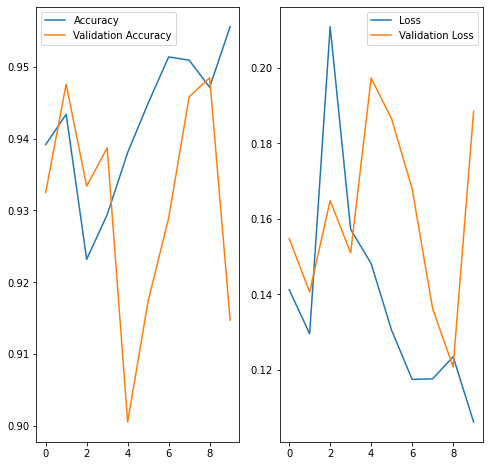

In [14]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

## We can see that the model overfit it learn to much the training data maybe because there aren't enough images so we will fit the model with less epochs to see if there any changes

In [15]:
epochs = 2
history = model.fit(train_data,epochs=epochs,validation_data=val_data, batch_size=batch_size)

Epoch 1/2
141/141 [==============================] - 114s 807ms/step - loss: 0.1058 - accuracy: 0.9556 - val_loss: 0.1427 - val_accuracy: 0.9396
Epoch 2/2
141/141 [==============================] - 127s 903ms/step - loss: 0.1046 - accuracy: 0.9576 - val_loss: 0.1349 - val_accuracy: 0.9440


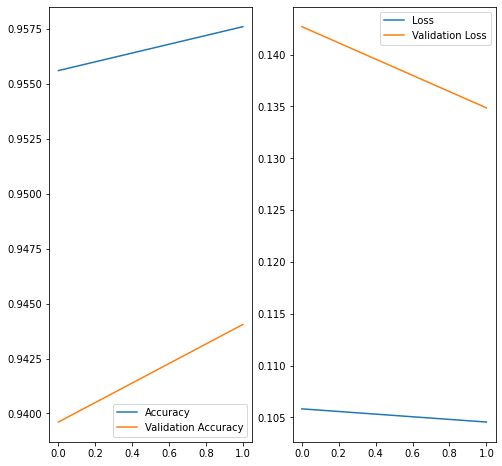

In [16]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

### Now we can see with 2 epochs that the model didn't overfit 

# Predictions

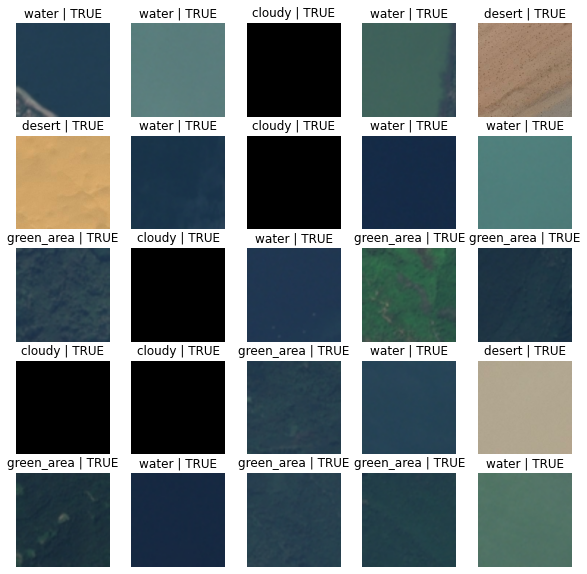

In [17]:
plt.figure(figsize=(10, 10))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")